# Prevalence Estimation Tasks on Simulated data

In [1]:
import sys
from os.path import dirname, abspath

sys.path.append(dirname(abspath('')))

In [2]:
from scipy.stats import beta, uniform

from pyquantifier.distributions import MultinomialDUD, MixtureCUD, IntrinsicJointDistribution, ExtrinsicJointDistribution
from pyquantifier.calibration_curve import PlattScaling
from pyquantifier.plot import *

## Intrinsic Data generation

### If the data generating process is $GT \rightarrow \mathcal{X}$

Data generating process:
- For any GT positive items, their uncalibrated classifier scores $P(UC(X)|GT=1)$ follow a Beta distribution $Beta(\alpha_p, \beta_p)$. If $\alpha_p > \beta_p$, the distribution is left skewed.
- For any GT negative items, their uncalibrated classifier scores $P(UC(X)|GT=0)$ follow a Beta distribution $Beta(\alpha_n, \beta_n)$. If $\alpha_n < \beta_n$, the distribution is right skewed.

Random variable that we allow it to change between base and target period:
- Prevalence of GT positive items, $P(GT=1)$

Statistics that we can derive from the above parameters:
- Joint distribution between $UC(X)$ and $GT$, $JD(UC(X), GT)$
- Observed classifier score distribution, $P(UC(X))$
- Probability calibration curve, $P(CC(X)|UC(X))$

## Explaining with the sentiment analysis task

Crowdsourced labeling task: Given this tweet, do you think the writer is happy or not?
Prevalence estimation task: Estimating the fraction of positive tweets in a dataset

Data generating process:
- $\alpha_p=10, \beta_p=2$. For any GT positive tweets, their classifier scores $P(UC(X)|GT=1)$ follow a Beta distribution $Beta(10, 2)$.
- $\alpha_n=2, \beta_n=5$. For any GT negative tweets, their classifier scores $P(UC(X)|GT=0)$ follow a Beta distribution $Beta(2, 5)$.

Random variable that we allow it to change between base and target period:
- Prevalence of GT positive tweets. Assume that each person only posts one tweet. 
    * In the base period, the fraction of happy Twitter users is 20%, $p_p=0.2$. 
    * At the target period, the fraction of happy Twitter users is 70%, $p_p=0.7$. 

Statistics that we can generate from the above parameters:
- Joint distribution between $UC(X)$ and $GT$, $JD(UC(X), GT)$
- Observed classifier score distribution, $P(UC(X))$
- Probability calibration curve, $P(CC(X)|UC(X))$

In [3]:
labels = ['pos', 'neg']

pos_cud = MixtureCUD(components=[beta(10, 2), uniform(0, 1)], weights=[0.95, 0.05])
neg_cud = MixtureCUD(components=[beta(2, 5), uniform(0, 1)], weights=[0.95, 0.05])

class_conditional_densities = {'pos': pos_cud, 'neg': neg_cud}

label_distribution = MultinomialDUD(['pos', 'neg'], [0.2, 0.8])

intrinsic_joint_distribution = IntrinsicJointDistribution(labels, label_distribution, class_conditional_densities)

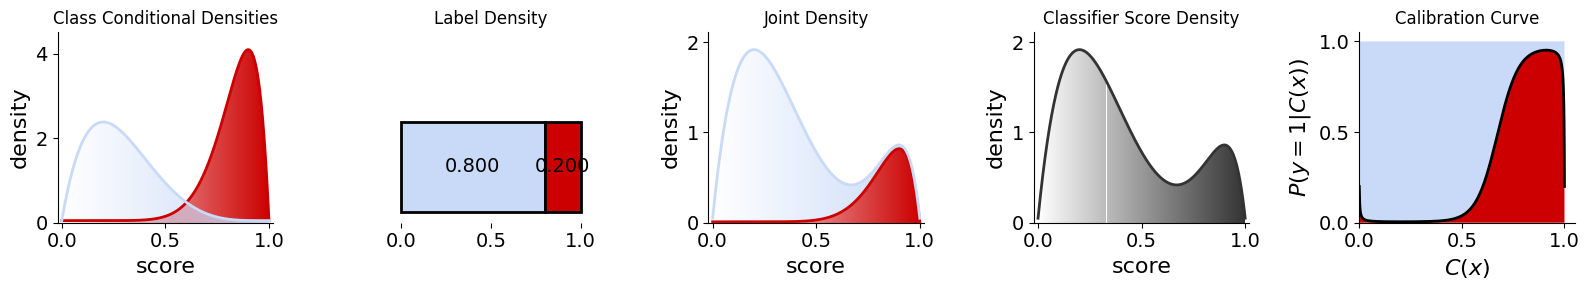

In [4]:
intrinsic_joint_distribution.plot_five_distributions()

In [5]:
labels = ['pos', 'neg']

pos_cud = MixtureCUD(components=[beta(10, 2), uniform(0, 1)], weights=[0.95, 0.05])
neg_cud = MixtureCUD(components=[beta(2, 5), uniform(0, 1)], weights=[0.95, 0.05])

class_conditional_densities = {'pos': pos_cud, 'neg': neg_cud}

label_distribution = MultinomialDUD(['pos', 'neg'], [0.8, 0.2])

intrinsic_joint_distribution = IntrinsicJointDistribution(labels, label_distribution, class_conditional_densities)

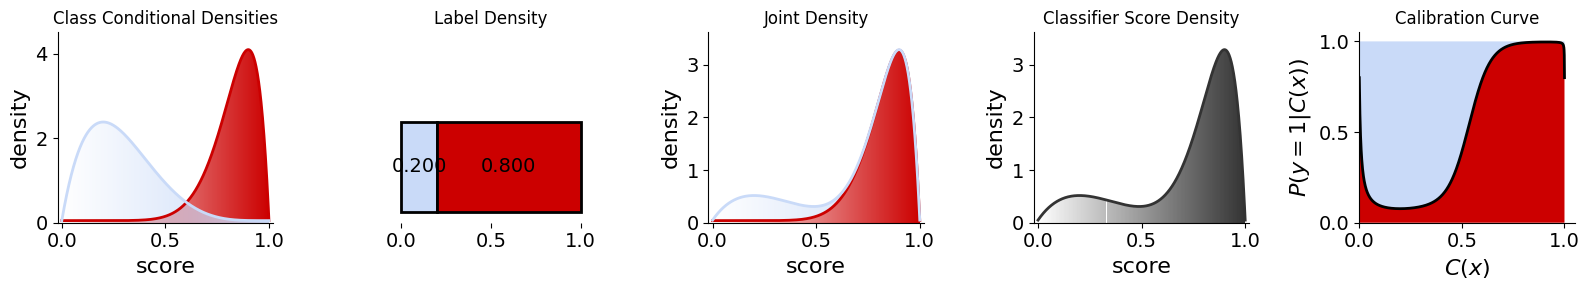

In [6]:
intrinsic_joint_distribution.plot_five_distributions()

In [7]:
labels = ['pos', 'neg']

pos_cud = MixtureCUD(components=[beta(10, 2), uniform(0, 1)], weights=[0.3, 0.7])
neg_cud = MixtureCUD(components=[beta(2, 5), uniform(0, 1)], weights=[0.3, 0.7])

class_conditional_densities = {'pos': pos_cud, 'neg': neg_cud}

label_distribution = MultinomialDUD(['pos', 'neg'], [0.2, 0.8])

intrinsic_joint_distribution = IntrinsicJointDistribution(labels, label_distribution, class_conditional_densities)

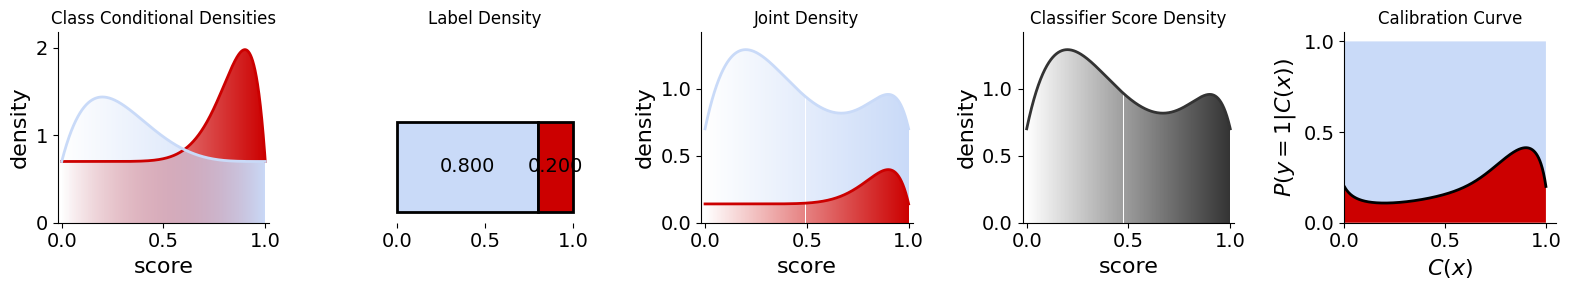

In [8]:
intrinsic_joint_distribution.plot_five_distributions()

In [9]:
labels = ['pos', 'neg']

pos_cud = MixtureCUD(components=[beta(6, 4), uniform(0, 1)], weights=[0.95, 0.05])
neg_cud = MixtureCUD(components=[beta(6, 5), uniform(0, 1)], weights=[0.95, 0.05])

class_conditional_densities = {'pos': pos_cud, 'neg': neg_cud}

label_distribution = MultinomialDUD(['pos', 'neg'], [0.2, 0.8])

intrinsic_joint_distribution = IntrinsicJointDistribution(labels, label_distribution, class_conditional_densities)

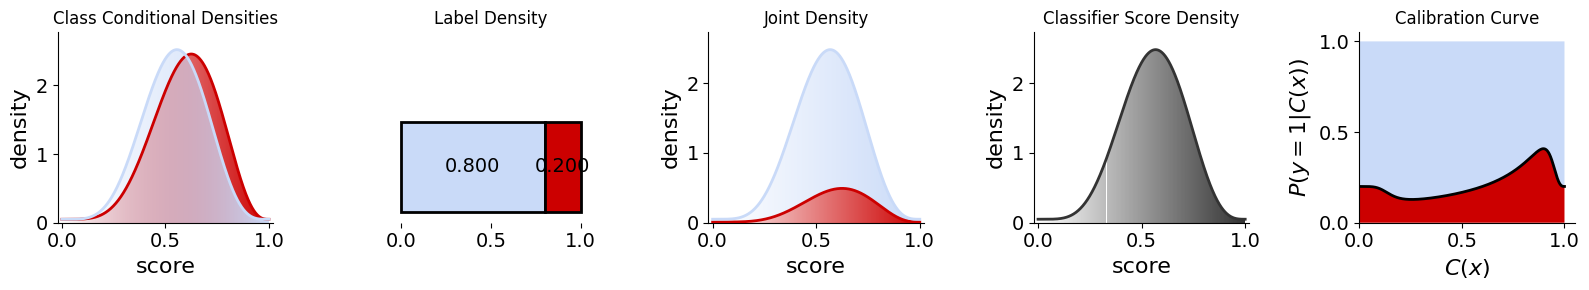

In [10]:
intrinsic_joint_distribution.plot_five_distributions()

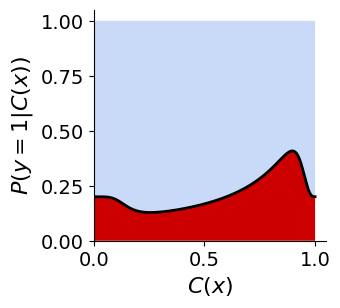

In [11]:
intrinsic_joint_distribution.calibration_curve.plot()

In [12]:
labels = ['pos', 'neg']

pos_cud = MixtureCUD(components=[beta(10, 2), uniform(0, 1)], weights=[1])
neg_cud = MixtureCUD(components=[beta(2, 5), uniform(0, 1)], weights=[1])

class_conditional_densities = {'pos': pos_cud, 'neg': neg_cud}

new_label_distribution = MultinomialDUD(['pos', 'neg'], [0.6, 0.4])

In [13]:
target_intrinsic_joint_distribution = IntrinsicJointDistribution(labels, new_label_distribution, class_conditional_densities)

/Users/siqiwu/Developments/GitWorks/pyquantifier/pyquantifier/distributions.py:610: RuntimeWarning: invalid value encountered in double_scalars
  y_axis = [pos_weight * self.class_conditional_densities['pos'].get_density(x) /


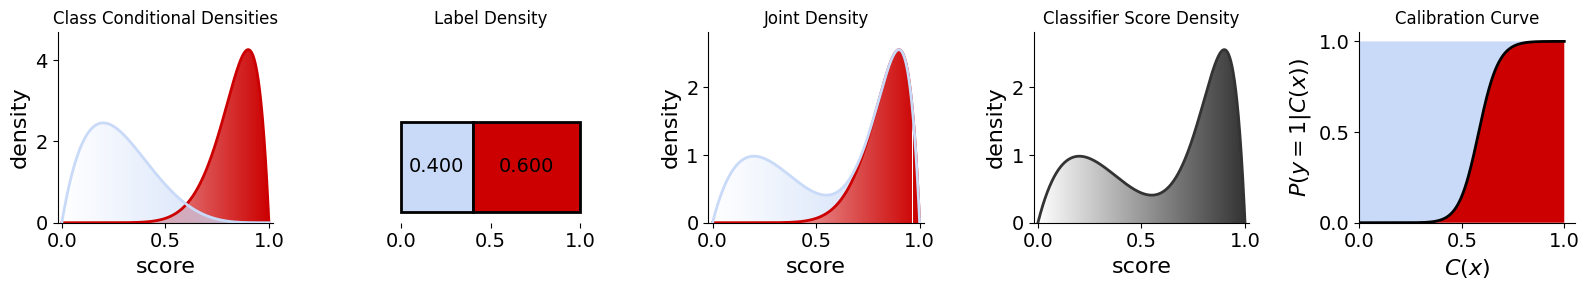

In [14]:
target_intrinsic_joint_distribution.plot_five_distributions()

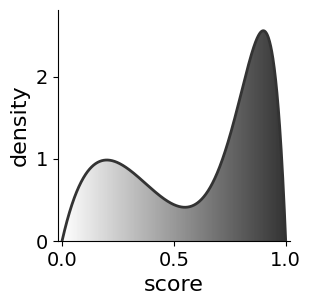

In [15]:
target_intrinsic_joint_distribution.calculate_classifier_score_distribution().plot()

## Extrinsic Data Generation

In [16]:
labels = ['pos', 'neg']
# classifier_score_distribution = MixtureCUD(components=[beta(10, 2), beta(2, 5)], weights=[2, 8])
classifier_score_distribution = target_intrinsic_joint_distribution.calculate_classifier_score_distribution()

# w = 21.92
# b = -14.61
# calibration_curve = PlattScaling()
# calibration_curve.set_params(w, b)

calibration_curve = intrinsic_joint_distribution.calibration_curve

In [17]:
calibration_curve.x_axis[-10:]

array([0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999,
       1.   ])

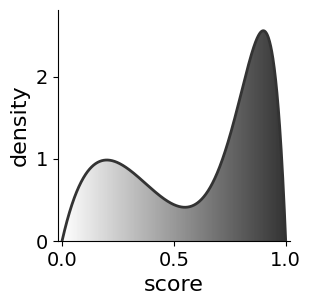

In [18]:
classifier_score_distribution.plot()

In [19]:
type(calibration_curve)

pyquantifier.calibration_curve.BinnedCalibrationCurve

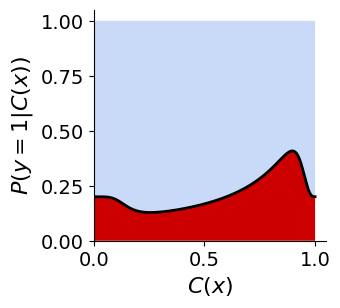

In [20]:
calibration_curve.plot()

In [21]:
extrinsic_joint_distribution = ExtrinsicJointDistribution(labels, classifier_score_distribution, calibration_curve)

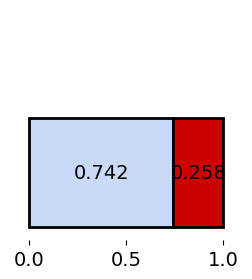

In [22]:
extrinsic_joint_distribution.label_distribution.plot()

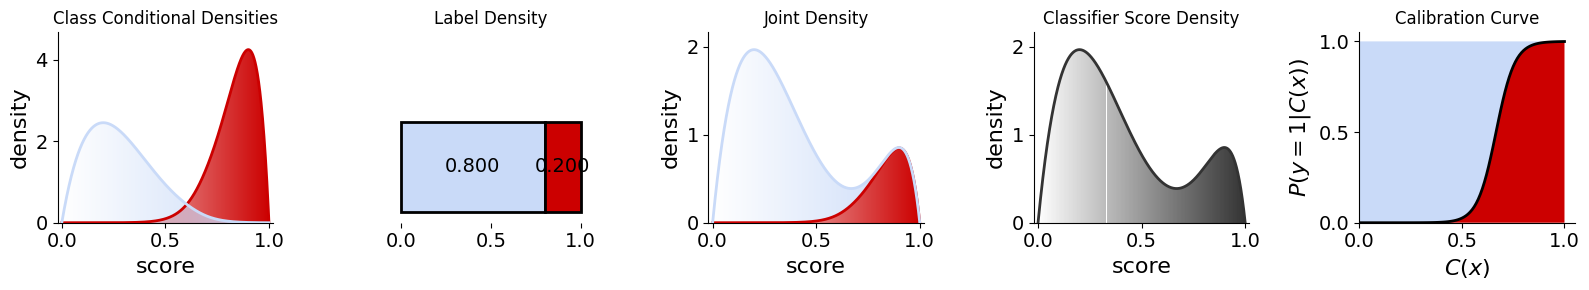

In [23]:
labels = ['pos', 'neg']

w = 21.92
b = -14.61
calibration_curve = PlattScaling()
calibration_curve.set_params(w, b)

classifier_score_distribution = MixtureCUD(components=[beta(10, 2), beta(2, 5)], weights=[2, 8])

extrinsic_joint_distribution = ExtrinsicJointDistribution(labels, classifier_score_distribution, calibration_curve)
extrinsic_joint_distribution.plot_five_distributions()

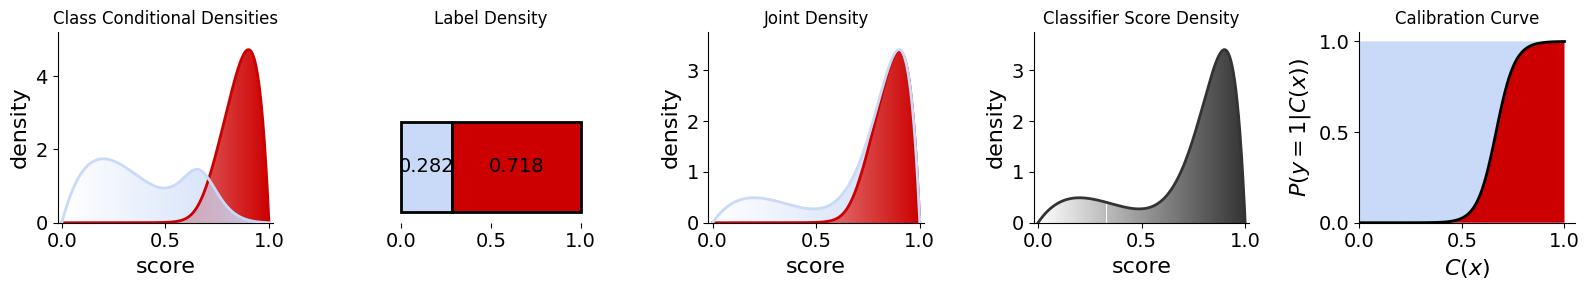

In [24]:
labels = ['pos', 'neg']

w = 21.92
b = -14.61
calibration_curve = PlattScaling()
calibration_curve.set_params(w, b)

classifier_score_distribution = MixtureCUD(components=[beta(10, 2), beta(2, 5)], weights=[8, 2])

extrinsic_joint_distribution = ExtrinsicJointDistribution(labels, classifier_score_distribution, calibration_curve)
extrinsic_joint_distribution.plot_five_distributions()

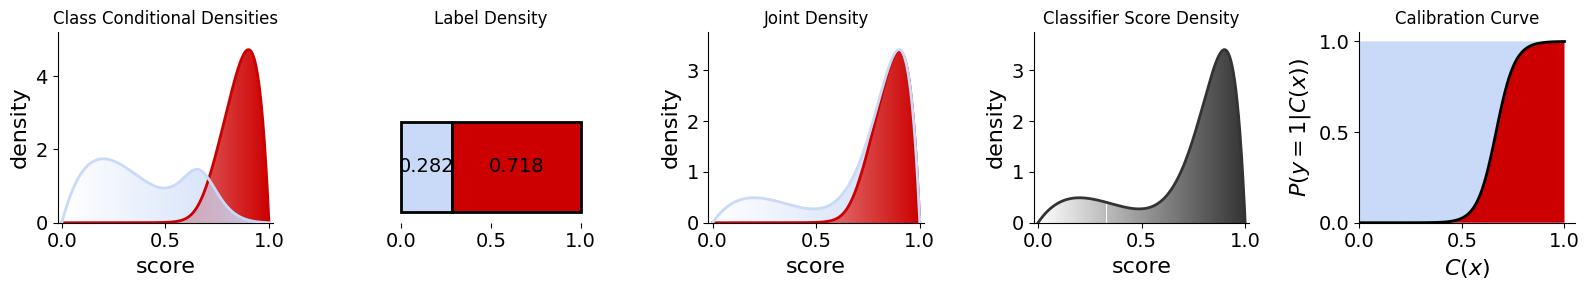

In [25]:
extrinsic_joint_distribution.plot_five_distributions()

In [26]:
borrowed_class_conditional_densities = extrinsic_joint_distribution.calculate_class_conditional_densities(num_bin=1000)

In [27]:
target_classifier_score_distribution = MixtureCUD(components=[beta(10, 2), beta(2, 5)], weights=[5, 5])

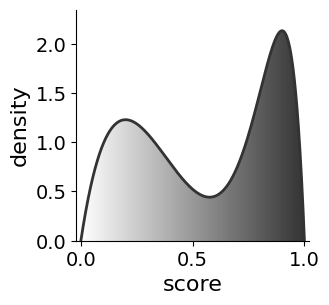

In [28]:
target_classifier_score_distribution.plot()

In [29]:
extrinsic_joint_distribution = ExtrinsicJointDistribution(labels, target_classifier_score_distribution, calibration_curve)

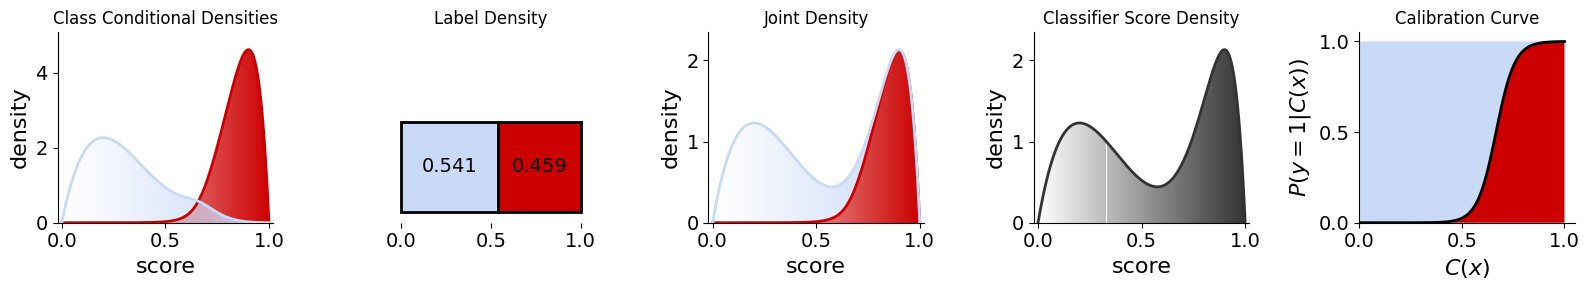

In [30]:
extrinsic_joint_distribution.plot_five_distributions()

## Generate synthetic items

### Data Format

|        | pos | neg | gender |   age |
|--------|-----|-----|--------|-------|
| item 1 | 0.2 | 0.8 | female | young |
| item 2 | 0.3 | 0.7 | female |   old |
|        |     |     |        |       |
| item n | 0.9 | 0.1 |   male |   old |

In [31]:
import numpy as np
from pyquantifier.data import Item, Dataset

all_labels = ['pos', 'neg']
all_genders = ['female', 'male']
all_ages = ['young', 'old']

# Generate 10000 items which pos scores follow the mixture distribution
mix_rv = MixtureCUD(components=[beta(10, 2), beta(2, 5)], weights=[2, 8])
simulated_pos_scores = mix_rv.generate_data(10000)

calibration_curve = PlattScaling()
w = 21.92
b = -14.61
calibration_curve.set_params(w, b)

items = []
gt_label_dict = {}
for idx, pos_score in enumerate(simulated_pos_scores):
    item = Item(uid=idx+1, labels=all_labels, probs=[pos_score, 1-pos_score], gender=np.random.choice(all_genders), age=np.random.choice(all_ages))
    items.append(item)

    calibrated_pos_score = calibration_curve.get_calibrated_prob(pos_score)[0]
    gt_label_dict[item.uid] = np.random.choice(all_labels, p=[calibrated_pos_score, 1-calibrated_pos_score])

dataset = Dataset(items=items, labels=all_labels)
dataset.df.shape


(10000, 5)

In [32]:
# ground truth label of item 1
gt_label_dict[1]

'neg'

In [33]:
dataset.df.head(5)

,uid,pos,neg,gender,age
0,1,0.371013,0.628987,female,old
1,2,0.233175,0.766825,female,young
2,3,0.436193,0.563807,female,young
3,4,0.337953,0.662047,male,old
4,5,0.885716,0.114284,female,old


In [34]:
def select_and_annotate_dataset(dataset, gt_label_dict, n, strategy):
    # strategy options are 'random', 'uniform', 'neyman'
    selected_dataset, selection_weights = dataset.select_sample_for_annotation(n=n, strategy=strategy, bins=10)
    annotated_labels = [gt_label_dict[uid] for uid in selected_dataset.df['uid'].values.tolist()]
    selected_dataset.annotate_sample(annotated_labels)
    return selected_dataset, selection_weights

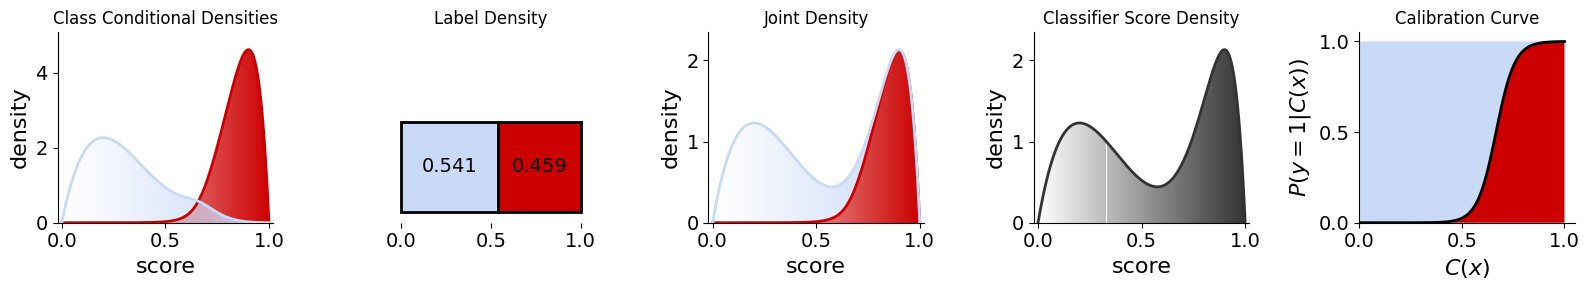

In [35]:
extrinsic_joint_distribution.plot_five_distributions()

In [36]:
random_selected_dataset, _ = select_and_annotate_dataset(dataset, gt_label_dict, n=2000, strategy='random')

array([<AxesSubplot:title={'center':'Class Conditional Densities'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Label Density'}>,
       <AxesSubplot:title={'center':'Joint Density'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Classifier Score Density'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Calibration Curve'}, xlabel='$C(x)$', ylabel='$P(y=1|C(x))$'>],
      dtype=object)

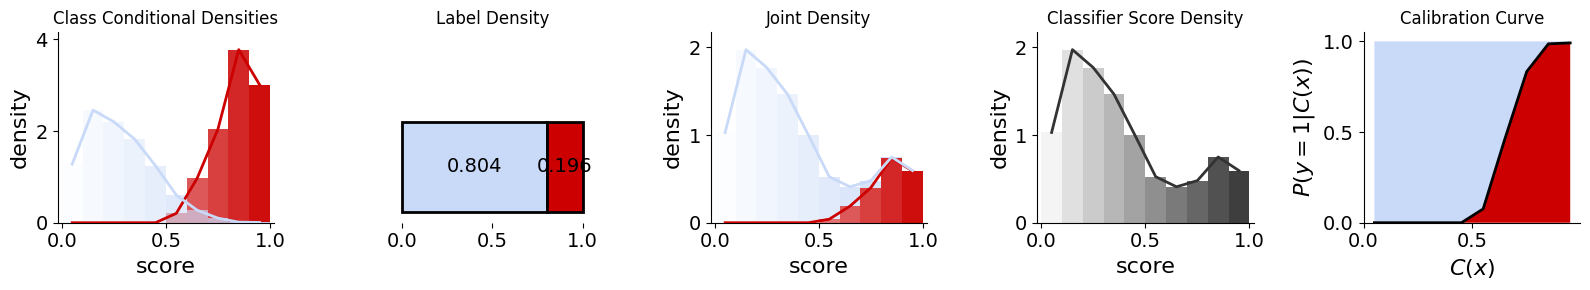

In [37]:
random_selected_dataset.profile_dataset(num_bin=10)

In [38]:
neyman_selected_dataset, neyman_selection_weights = select_and_annotate_dataset(dataset, gt_label_dict, n=2000, strategy='neyman')

original_bin_dict {2: 1876, 1: 1837, 3: 1531, 4: 1009, 0: 921, 8: 763, 9: 595, 5: 571, 7: 472, 6: 425}
to_sample_bin_dict {0: 101, 1: 328, 2: 407, 3: 366, 4: 251, 5: 142, 6: 101, 7: 102, 8: 136, 9: 65}


array([<AxesSubplot:title={'center':'Class Conditional Densities'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Label Density'}>,
       <AxesSubplot:title={'center':'Joint Density'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Classifier Score Density'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Calibration Curve'}, xlabel='$C(x)$', ylabel='$P(y=1|C(x))$'>],
      dtype=object)

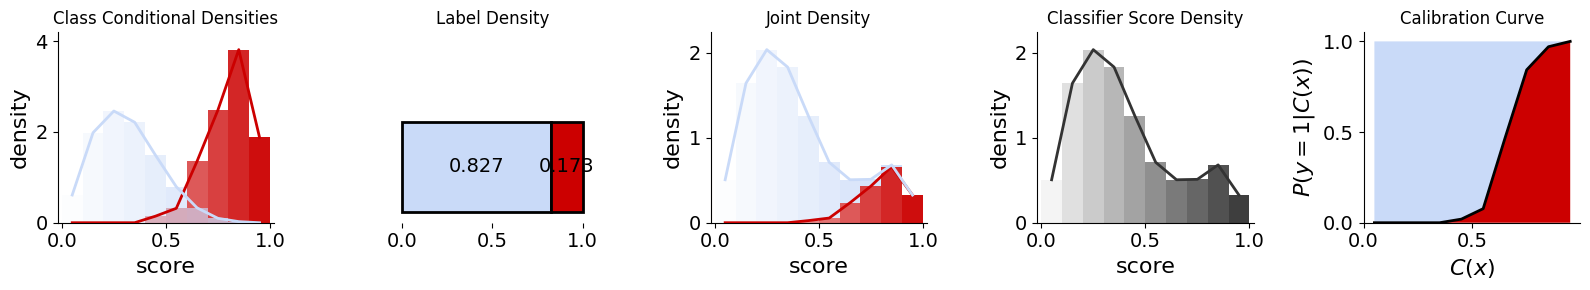

In [39]:
neyman_selected_dataset.profile_dataset(num_bin=10)

In [40]:
uniform_selected_dataset, uniform_selection_weights = select_and_annotate_dataset(dataset, gt_label_dict, n=2000, strategy='uniform')

original_bin_dict {2: 1876, 1: 1837, 3: 1531, 4: 1009, 0: 921, 8: 763, 9: 595, 5: 571, 7: 472, 6: 425}
to_sample_bin_dict {0: 200, 1: 200, 2: 200, 3: 200, 4: 200, 5: 200, 6: 200, 7: 200, 8: 200, 9: 200}


array([<AxesSubplot:title={'center':'Class Conditional Densities'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Label Density'}>,
       <AxesSubplot:title={'center':'Joint Density'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Classifier Score Density'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Calibration Curve'}, xlabel='$C(x)$', ylabel='$P(y=1|C(x))$'>],
      dtype=object)

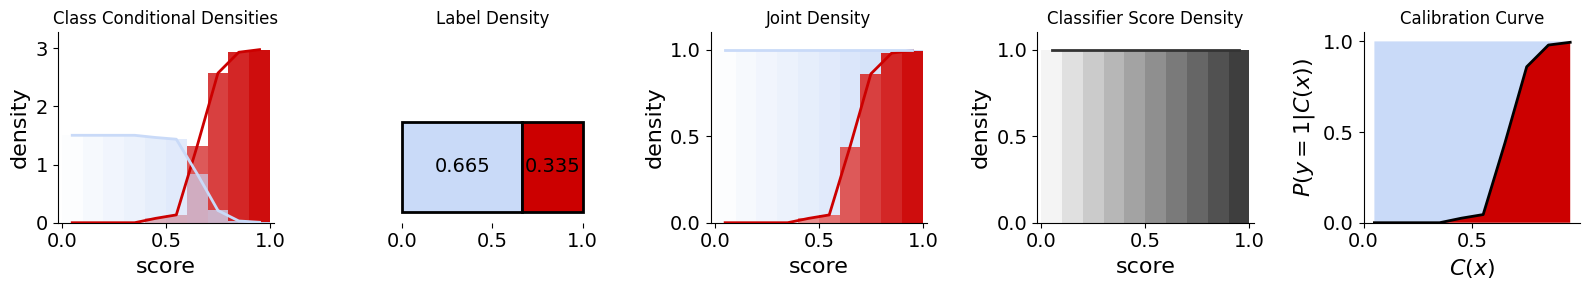

In [41]:
uniform_selected_dataset.profile_dataset(num_bin=10)

In [42]:
uniform_selected_dataset.update_dataset_model(num_bin=20)

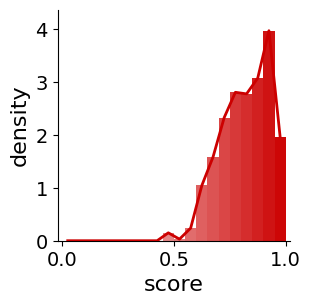

In [43]:
uniform_selected_dataset.class_conditional_densities['pos'].plot(color=ColorPalette['pos'])

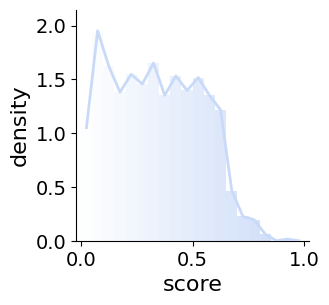

In [44]:
uniform_selected_dataset.class_conditional_densities['neg'].plot(color=ColorPalette['neg'])

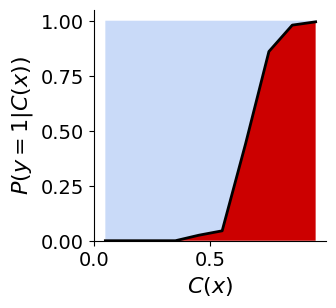

In [45]:
uniform_selected_dataset.calibration_curve.plot()

In [46]:
uniform_selected_dataset.update_calibration_curve(method='platt scaling')

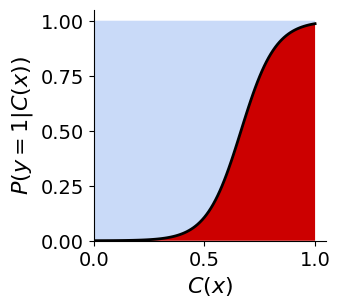

In [47]:
uniform_selected_dataset.calibration_curve.plot()

## Recover the original class density functions

In [48]:
uniform_selection_weights

[0.21715526601520088,
 0.10887316276537834,
 0.10660980810234541,
 0.13063357282821686,
 0.19821605550049554,
 0.3502626970227671,
 0.47058823529411764,
 0.423728813559322,
 0.2621231979030144,
 0.33613445378151263]

array([<AxesSubplot:title={'center':'Class Conditional Densities'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Label Density'}>,
       <AxesSubplot:title={'center':'Joint Density'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Classifier Score Density'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Calibration Curve'}, xlabel='$C(x)$', ylabel='$P(y=1|C(x))$'>],
      dtype=object)

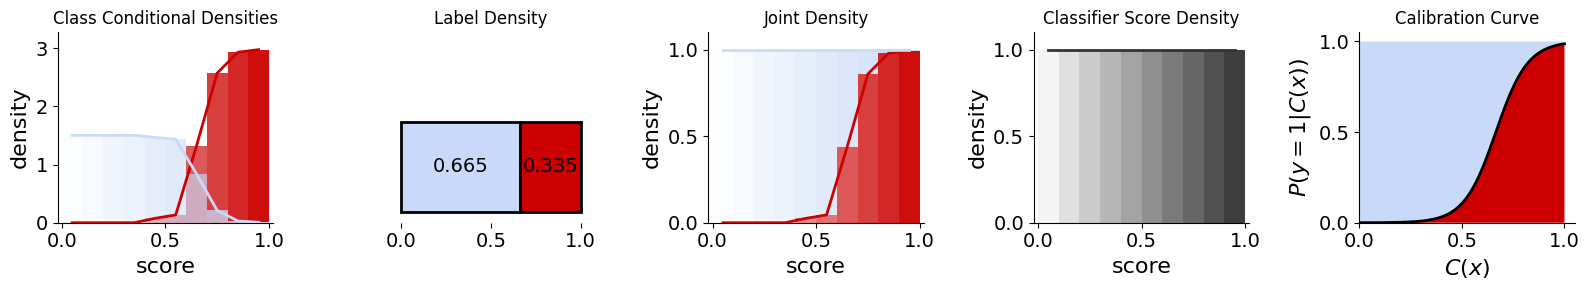

In [49]:
uniform_selected_dataset.profile_dataset(num_bin=10)

array([<AxesSubplot:title={'center':'Class Conditional Densities'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Label Density'}>,
       <AxesSubplot:title={'center':'Joint Density'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Classifier Score Density'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Calibration Curve'}, xlabel='$C(x)$', ylabel='$P(y=1|C(x))$'>],
      dtype=object)

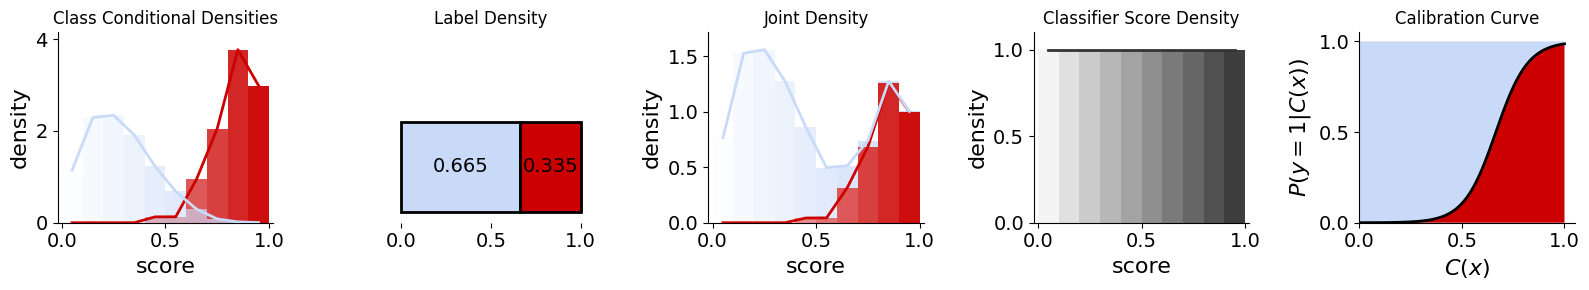

In [50]:
uniform_selected_dataset.profile_dataset(num_bin=10, selection_weights=uniform_selection_weights)

### An alternative way of using observed classifier score density and fitted calibration curve

In [51]:
fitted_calibration_curve = uniform_selected_dataset.generate_calibration_curve(method='platt scaling')

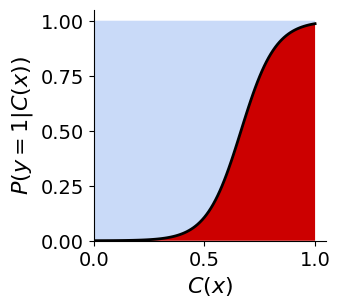

In [52]:
fitted_calibration_curve.plot()

In [53]:
original_classifier_score_density = dataset.infer_classifier_score_distribution(num_bin=20)

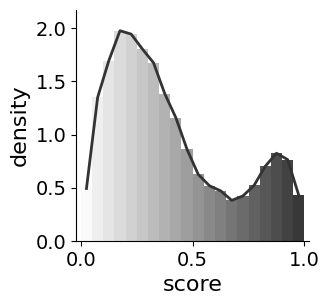

In [54]:
original_classifier_score_density.plot()

In [55]:
original_classifier_score_density.num_bin

20

In [56]:
original_joint_distribution = ExtrinsicJointDistribution(labels, original_classifier_score_density, fitted_calibration_curve)

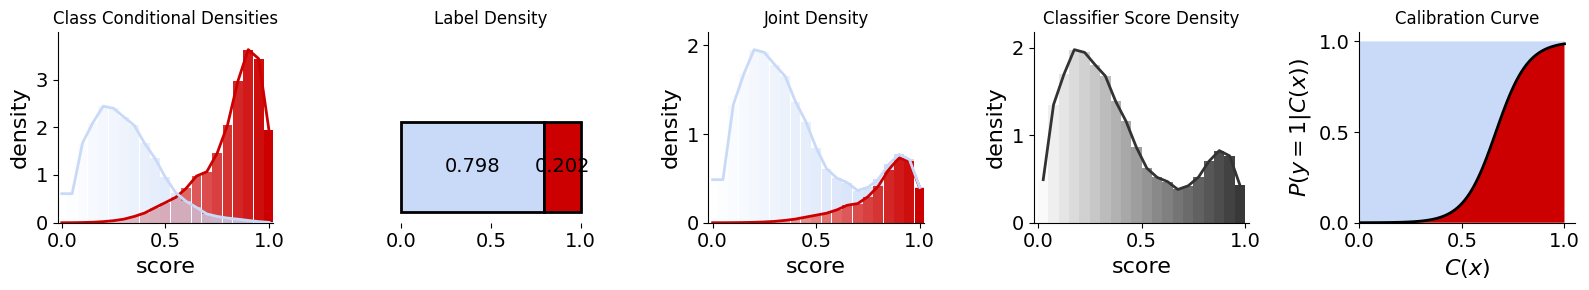

In [57]:
original_joint_distribution.plot_five_distributions()

array([<AxesSubplot:title={'center':'Class Conditional Densities'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Label Density'}>,
       <AxesSubplot:title={'center':'Joint Density'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Classifier Score Density'}, xlabel='score', ylabel='density'>,
       <AxesSubplot:title={'center':'Calibration Curve'}, xlabel='$C(x)$', ylabel='$P(y=1|C(x))$'>],
      dtype=object)

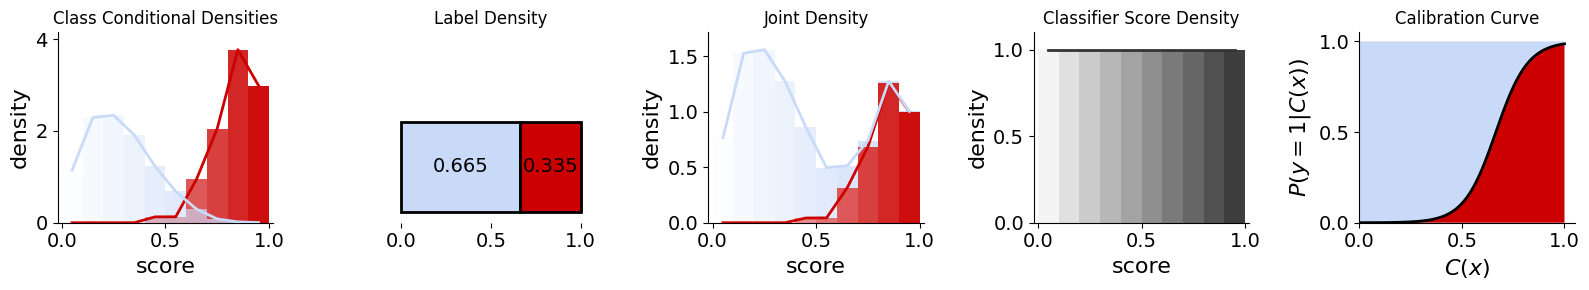

In [58]:
uniform_selected_dataset.profile_dataset(num_bin=10, selection_weights=uniform_selection_weights)

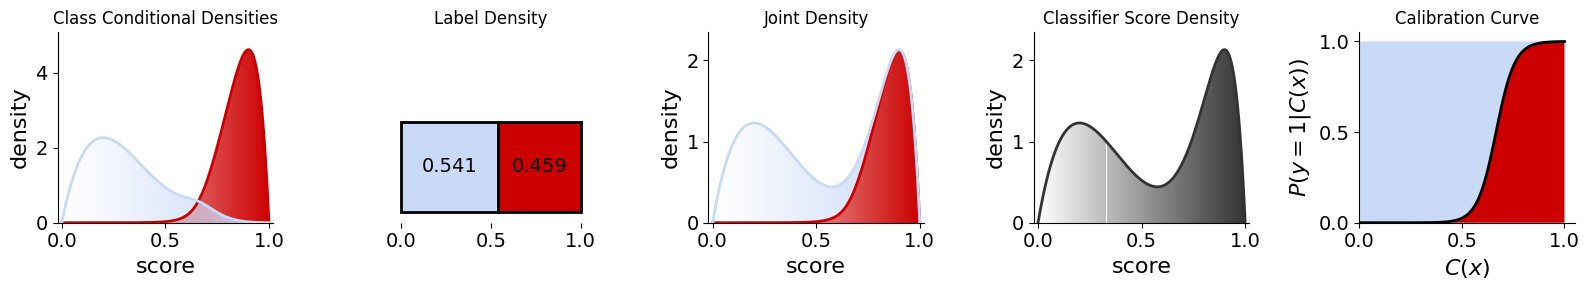

In [59]:
extrinsic_joint_distribution.plot_five_distributions()